## Etapa 1: Problema

#### A partir de um conjunto de dados coletados do Censo de 1994 nos EUA, implementar um modelo que prevê se um indivíduo ganha mais de US \$ 50000 por ano.  

## Etapa 2: Checagem e limpeza de dados

#### Inicialmente vamos ler o conjunto de dados através de um DataFrame do pandas

In [108]:
import numpy as np
import pandas as pd

data = pd.read_csv('census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [93]:
num_samples = data.shape[0]
num_samples

5533

In [94]:
data.describe().astype(int)

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5533,5533,5532,5532,5532
mean,38,10,1065,92,41
std,13,2,7251,409,11
min,17,1,0,0,1
25%,28,9,0,0,40
50%,37,10,0,0,40
75%,47,13,0,0,45
max,90,16,99999,2824,99


#### Como se pode observar, o número de amostras do conjunto de dados é 5533 e na contagem de dados das variáveis contínuas do *dataset* temos um valor faltante para as variáveis *capital-gain*, *capital-loss* e *hours-per-week*.

#### Dessa forma, vamos verificar quais amostras do *dataset* apresentam valores faltantes.

In [109]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

#### Além das variáveis contínuas mencionadas, temos valores faltantes nas variáveis categóricas *native-country* e *income*. 

#### Vamos checar em quantas instâncias temos valores faltantes:

In [104]:
num_na_rows = data.shape[0] - data.dropna().shape[0]
num_na_rows

1

#### Como só há uma instância com valor faltante, decidimos ignorá-la.

In [111]:
# Elimina linha com valores faltantes
data = data.dropna()
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5527,57,Self-emp-not-inc,10th,6.0,Divorced,Exec-managerial,Own-child,White,Male,0.0,0.0,60.0,United-States,>50K
5528,47,Private,Some-college,10.0,Widowed,Other-service,Not-in-family,White,Female,0.0,0.0,35.0,United-States,<=50K
5529,51,Local-gov,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,Black,Male,0.0,0.0,60.0,United-States,<=50K
5530,34,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
5531,52,Private,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


#### Antes de tudo, vamos visualizar os dados a fim de identificar possíveis *outliers* e erros

In [120]:
# Para mostrar plots da biblioteca matplotlib no notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="ticks", color_codes=True)

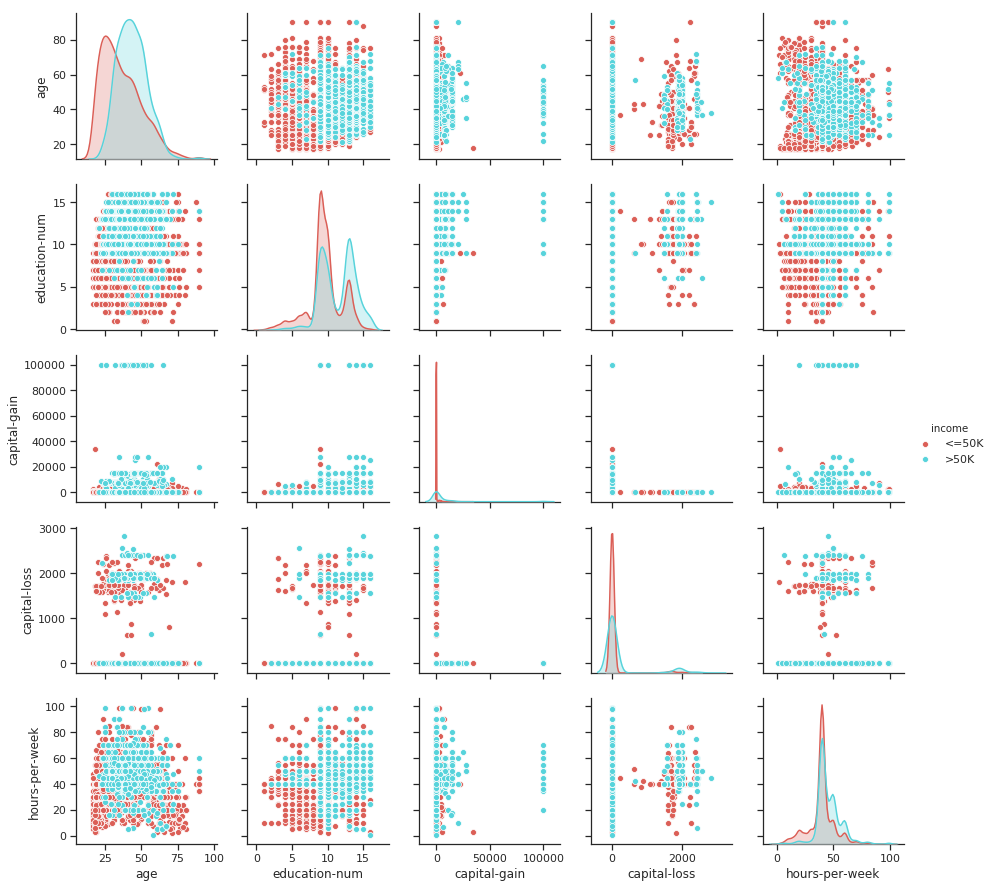

In [121]:
sb.pairplot(data, hue='income', palette='hls')

#### Como se pode observar no *pairplot* das variáveis contínuas, *capital-gain* e *capital-loss* apresentam distribuições enviesadas (pouca variância, dificultando a separação entre as duas classes desejadas).

#### Para evitar os *outliers* vamos usar uma transformação logarítmica

In [126]:
# Log(x+1), pois existem amostras de valor zero e não existe log de zero.
data[['capital-gain', 'capital-loss']] = data[['capital-gain', 'capital-loss']].apply(lambda x: np.log(x+1))

#### Reanalisando o gráfico de *pairplot*, temos:

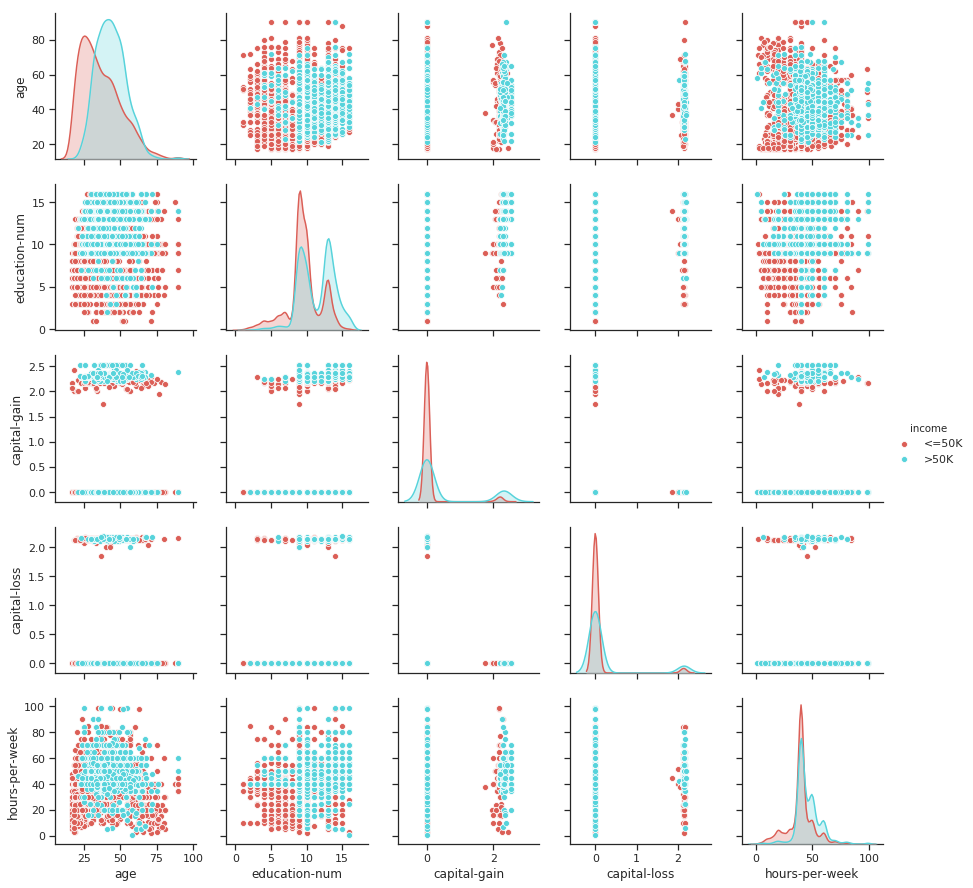

In [127]:
sb.pairplot(data, hue='income', palette='hls')

#### Agora vamos normalizar as variáveis numéricas de modo que fiquem no intervalo [0, 1] e dessa forma todos os dados de entrada estaram na mesma escala (alguns algoritmos de *Machine Learning* são variantes à escala).

#### A equação de normalização aplicada nas variáveis numéricas é dada por:
 
$$\ x_{scaled}=\frac{X - X_{min}}{X_{max} - X_{min}}$$

In [ ]:
#### Visto que a variável *occupation* 

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Colunas numéricas
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Colunas não numéricas (transformaçaõ de strings para números)
non_numerical_columns = data.select_dtypes()

In [159]:
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.855471,0.000000,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,0.397959,Cuba,<=50K
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,0.397959,United-States,<=50K
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.000000,0.153061,Jamaica,<=50K
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,0.448980,United-States,>50K
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.932576,0.000000,0.500000,United-States,>50K
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.893155,0.000000,0.397959,United-States,>50K


In [164]:
# Separar features e labels
labels = data['income']
features = data.drop('income', axis = 1)

In [165]:
labels

0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
5       <=50K
6       <=50K
7        >50K
8        >50K
9        >50K
10       >50K
11       >50K
12      <=50K
13      <=50K
14      <=50K
15      <=50K
16      <=50K
17      <=50K
18       >50K
19       >50K
20      <=50K
21      <=50K
22      <=50K
23      <=50K
24       >50K
25      <=50K
26      <=50K
27      <=50K
28      <=50K
29      <=50K
        ...  
5502    <=50K
5503    <=50K
5504    <=50K
5505    <=50K
5506     >50K
5507    <=50K
5508    <=50K
5509    <=50K
5510    <=50K
5511     >50K
5512    <=50K
5513     >50K
5514    <=50K
5515     >50K
5516     >50K
5517    <=50K
5518     >50K
5519     >50K
5520    <=50K
5521    <=50K
5522    <=50K
5523     >50K
5524     >50K
5525    <=50K
5526    <=50K
5527     >50K
5528    <=50K
5529    <=50K
5530    <=50K
5531     >50K
Name: income, Length: 5532, dtype: object

#### 

#### Transformar labels de string para números:

In [162]:
labels = labels.replace({'<=50K':0, '>50K':1})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

#### Codificar também as variáveis categóricas:

In [167]:
features = pd.get_dummies(features)
features.columns.tolist()

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-cleri